# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [3]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [5]:
# your code here- numerical variable
#dtypes, se seleccionan todos los que no sean object type
titanic.select_dtypes(exclude=object)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [6]:
#your code here- categorical variable
#se excluyen todas las que no sean categoricas
titanic.select_dtypes(exclude=['int','float'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [9]:
# your code here
plt.style.use('classic')
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))


<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

Text(0.5, 0, 'Edad')

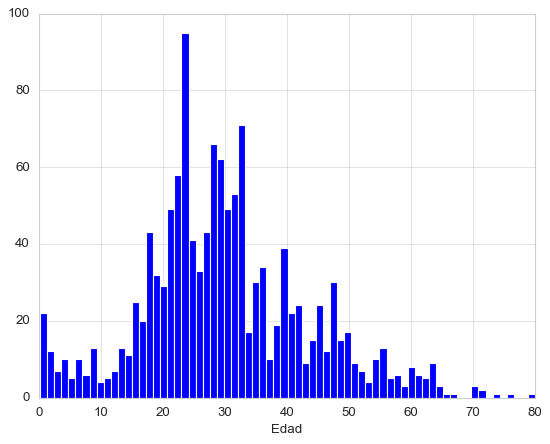

In [15]:
# your code here

titanic.Age.hist(bins=70)
plt.xlabel('Edad')

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

Text(0.5, 0, 'Edad')

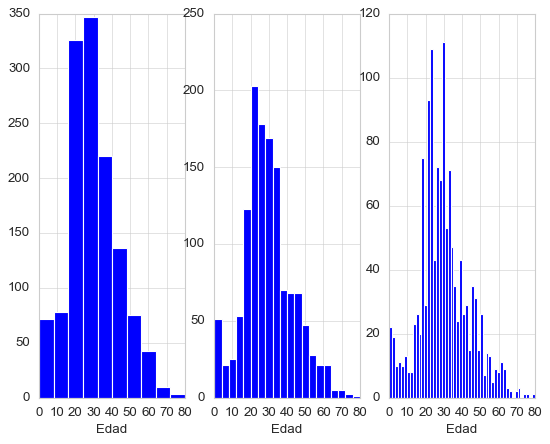

In [19]:
# your code here
plt.subplot(1,3,1)
titanic['Age'].hist()
plt.xlabel('Edad')
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)
plt.xlabel('Edad')
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50)
plt.xlabel('Edad')

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
'''la altura de un Bin te dice cuantos valores caen en ese rango, pero entre mayor sea
el rango de bins, los datos seran mas finos y mas representativos de lo que tienes en el df'''

#### Use seaborn to show the distribution of the column `Age`

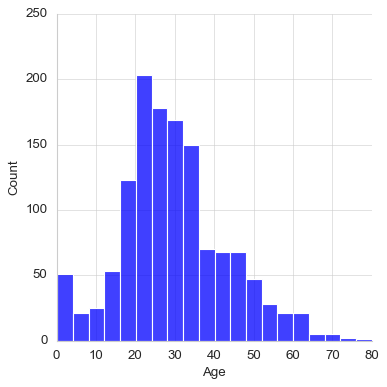

In [21]:
# your code here
sns.displot(titanic.Age,bins=20,kde=False,)


#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

<AxesSubplot:xlabel='Gender'>

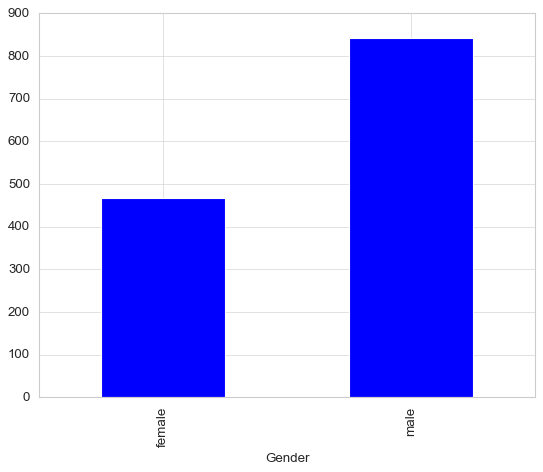

In [32]:
# your code here- 1st way
titanic.groupby('Gender').size().plot(kind='bar')

<AxesSubplot:xlabel='Gender', ylabel='count'>

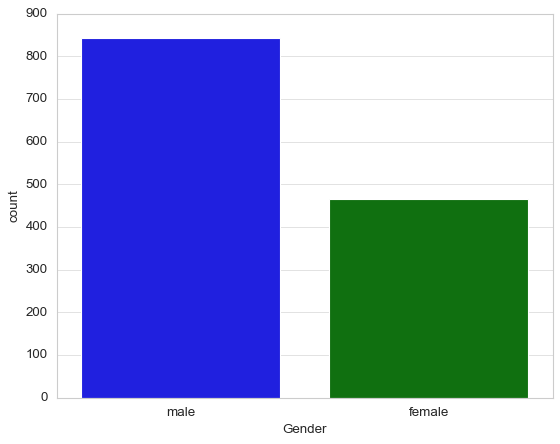

In [35]:
# your code here- 2nd way

sns.countplot(x='Gender',data=titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


Text(0, 0.5, 'Count')

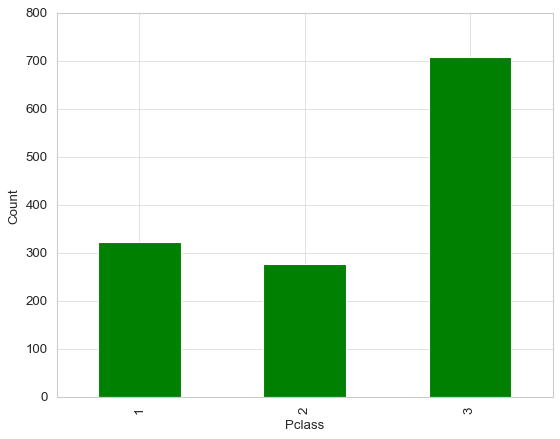

In [43]:
# your code here
titanic.Pclass.value_counts()
titanic.groupby('Pclass').size().plot(kind='bar',color='green')
plt.ylabel('Count')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

c:\Users\fhernandezcortez\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

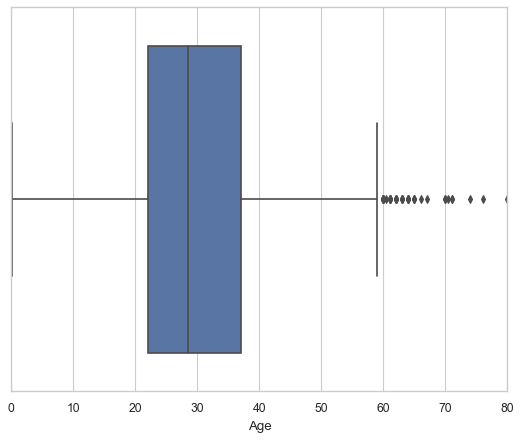

In [47]:
# your code here
#para mostrar todo el resumen de estadistica de una variable, opino que boxplot es la mejor grafica
sns.set_theme(style="whitegrid")

sns.boxplot(titanic.Age)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
#la media de edad es aproximadamente 28 años, la distribucion de los datos no es normal,
#y hay algunos datos que estan afuera de los maximos (58 años)

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

<AxesSubplot:xlabel='Age'>

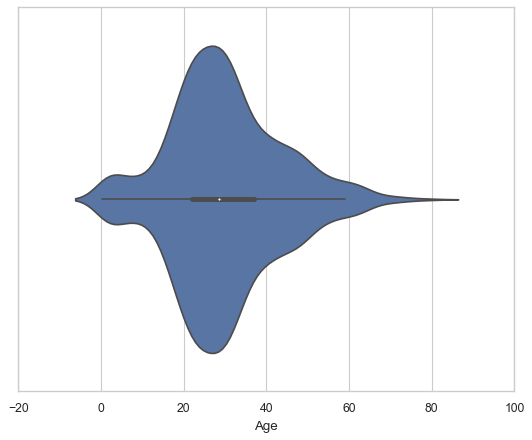

In [48]:
#your code here
sns.violinplot(x="Age",data=titanic)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
'''la mayoria de los datos se encuentran entre los 20 y los 40 años de edad. '''

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

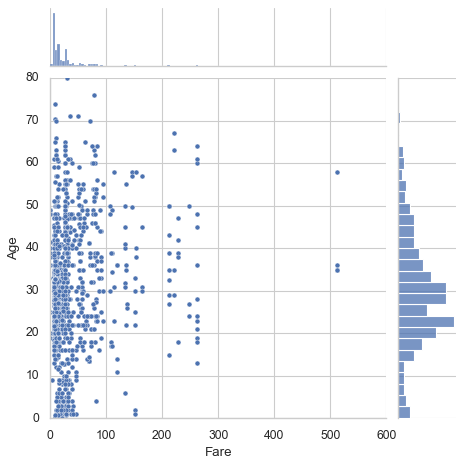

In [50]:
#your code-1st way
sns.jointplot(x='Fare',y='Age',data=titanic)

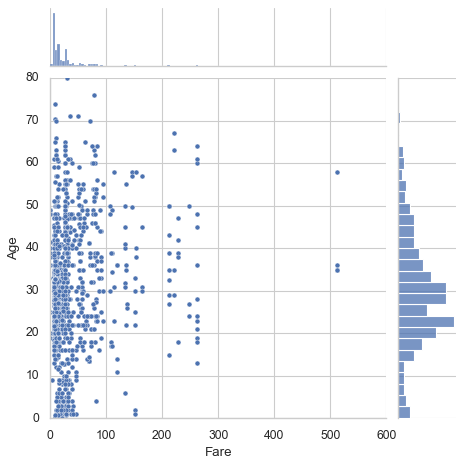

In [49]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

Text(0.5, 1.0, 'Matriz de correlacion')

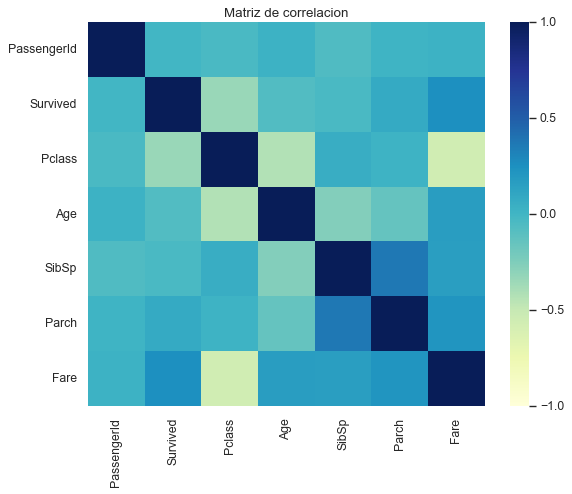

In [58]:
#your code here
#sns.heatmap(titanic.corr, cmap='YlGnBu', vmax = 1, vmin = 0, annot = True, square = True, center = 0, linewidths = 0.5)
sns.heatmap(titanic.corr(),cmap='YlGnBu',vmax=1,vmin=-1)
plt.title('Matriz de correlacion')

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#en este caso seria Parch con SibSP, no se especificamente que signifique, pero si tiene sentido
#que el numero de sobrevivientes tenga que ver con la tarifa que se pago.

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

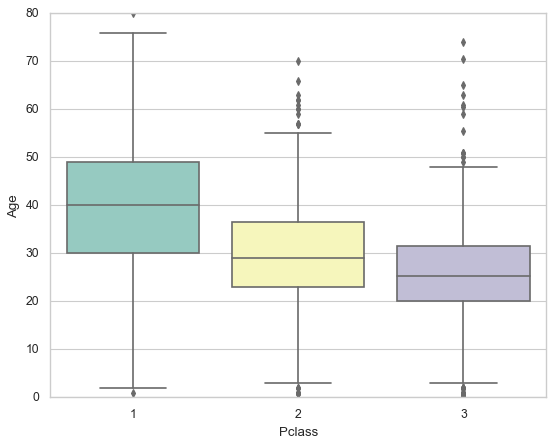

In [59]:
#your code here
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='Set3')

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

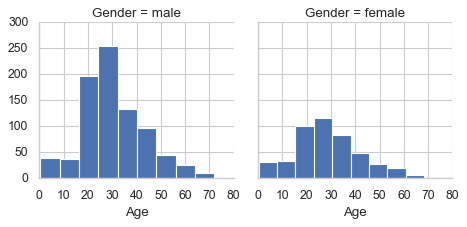

In [60]:
#your code here
edad = sns.FacetGrid(data=titanic,col='Gender')
edad.map(plt.hist,'Age')